In [30]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier

# Створення датафрейму з вхідними даними
data = pd.DataFrame({
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
    'NOR': [1, 0, 0, 0],
    'NAND': [1, 1, 1, 0]
})

data.head()

,A,B,NOR,NAND
0,0,0,1,1
1,0,1,0,1
2,1,0,0,1
3,1,1,0,0


In [31]:
# Створення стовпця "Class" на основі конкатенації стовпців NOR і NAND
data['Class'] = data['NOR'].astype(str) + data['NAND'].astype(str)

data.head()


,A,B,NOR,NAND,Class
0,0,0,1,1,11
1,0,1,0,1,01
2,1,0,0,1,01
3,1,1,0,0,00


In [32]:
# Розділення датафрейму на ознаки (X) та мітки класу (Y)
X = data[['A', 'B']]
Y = data['Class']

In [33]:
# Створення об'єкту дерева рішень
clf = DecisionTreeClassifier()

# Побудова дерева рішень на основі вхідних даних
clf.fit(X, Y)

# Класифікація нового об'єкту
new_object = data = pd.DataFrame({
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
})  # Новий об'єкт, для якого потрібно зробити прогноз

new_object.head()


,A,B
0,0,0
1,0,1
2,1,0
3,1,1


In [34]:
prediction = clf.predict(new_object)
print("Прогнозована мітка класу для нового об'єкту:", prediction)

Прогнозована мітка класу для нового об'єкту: ['11' '01' '01' '00']


In [35]:
from sklearn.tree import export_graphviz
import graphviz

# Генерація коду для візуалізації дерева рішень
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=clf.classes_, filled=True)

# Створення об'єкту графу на основі згенерованого коду
graph = graphviz.Source(dot_data)

# Відображення графічного представлення дерева
graph.render(filename='decision_tree', format='png', cleanup=True)
graph.view()

'decision_tree.pdf'

Будемо працювати з набором даних для задачі класифікації - дані про серцево-судинні захворювання.

У цій задачі пропонується передбачити наявність серцево-судинних захворювань на основі результатів класичного медичного огляду. 
Датасет містить три групи ознак:
    Об'єктивні ознаки:
        Вік (у днях);
        Зріст;
        Вага;
    Стать;
        Результати вимірювання:
        Верхній та нижній артеріальний тиск;
        Рівень холестерину (три групи: норма, вище норми, значно вище норми);
        Рівень глюкози (три групи: норма, вище норми, значно вище норми);
    Суб'єктивні ознаки (бінарні):
        Куріння;
        Споживання алкоголю;
        Фізична активність.

In [36]:
full_df = pd.read_csv('cardio.csv', sep=';')
full_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Робота з даними
Перевіримо чи необхідно очищення та обробка даних

In [37]:
# інформація про дані - назви стовпців, кількість, типи даних
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [38]:
#Переведемо вік у роки
full_df['age'] = round(full_df['age'] / 365)
full_df.age = full_df.age.astype(np.int64)
full_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [39]:
#перетворимо представлення ваги з float64 на цілі числа.
full_df.weight = full_df.weight.astype(np.int64)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [40]:
full_df.weight.describe()

count    70000.000000
mean        74.204329
std         14.395953
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [41]:
#Найхудіща доросла людина на Землі важить приблизно 23 кг, тому всі інші дані можуть бути викидами
full_df = full_df[full_df.weight > 30]
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69990 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           69990 non-null  int64
 1   age          69990 non-null  int64
 2   gender       69990 non-null  int64
 3   height       69990 non-null  int64
 4   weight       69990 non-null  int64
 5   ap_hi        69990 non-null  int64
 6   ap_lo        69990 non-null  int64
 7   cholesterol  69990 non-null  int64
 8   gluc         69990 non-null  int64
 9   smoke        69990 non-null  int64
 10  alco         69990 non-null  int64
 11  active       69990 non-null  int64
 12  cardio       69990 non-null  int64
dtypes: int64(13)
memory usage: 7.5 MB


In [42]:
full_df.weight.describe()

count    69990.000000
mean        74.211587
std         14.383905
min         31.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [43]:
full_df.ap_hi.describe()

count    69990.000000
mean       128.818217
std        154.022205
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [44]:
#нормальний діапазон систолічного артеріального тиску може бути від 70 до 200

full_df = full_df[(full_df.ap_hi < 200) & (full_df.ap_hi > 70 )]
full_df.ap_hi.describe()

count    69572.000000
mean       126.823420
std         16.626402
min         80.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        199.000000
Name: ap_hi, dtype: float64

In [45]:
full_df.ap_lo.describe()

count    69572.000000
mean        96.114543
std        183.297261
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      10000.000000
Name: ap_lo, dtype: float64

In [46]:
#діастолічний тиск значно перевищує середній діапазон 40:100
full_df = full_df[(full_df.ap_lo < 100) &( full_df.ap_lo > 40 )]
full_df.ap_lo.describe()

count    63883.000000
mean        79.776764
std          7.661501
min         45.000000
25%         80.000000
50%         80.000000
75%         80.000000
max         99.000000
Name: ap_lo, dtype: float64

<Axes: >

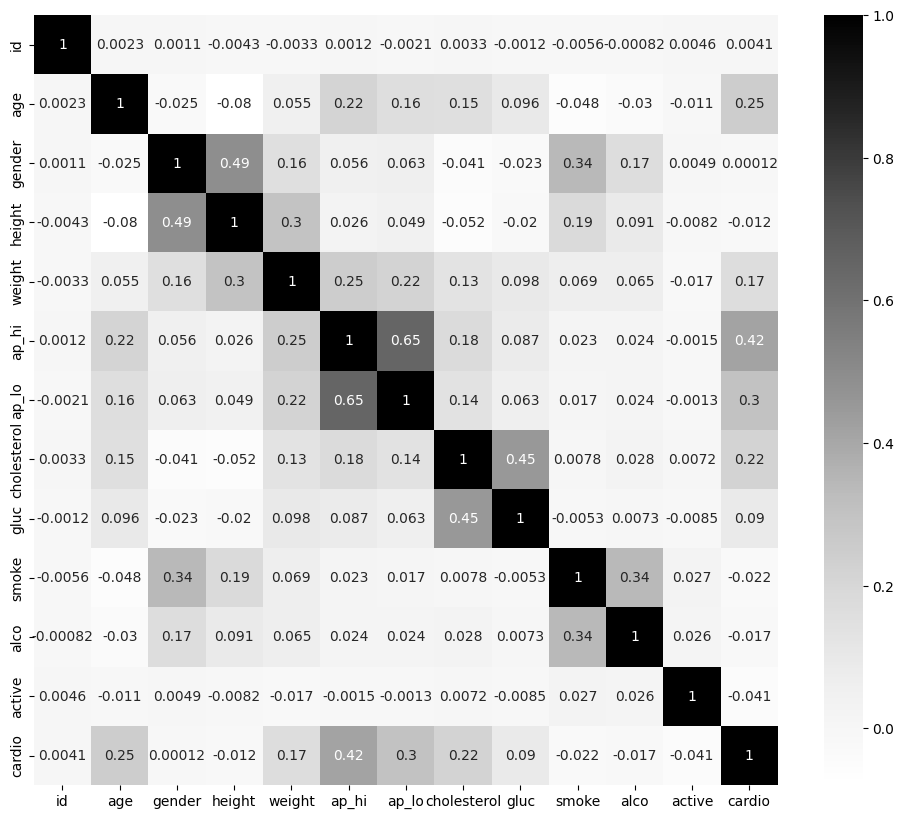

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
sns.heatmap(full_df.corr() , cmap = 'Greys' , annot = True)

In [48]:
y = full_df['cardio'].astype(str)
X = full_df.drop(['cardio'] , axis =1)

#Розділяємо датасет на тренувальний та тестовий
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
from sklearn import tree

dec = tree.DecisionTreeClassifier(max_depth=3)

dec.fit(X_train, y_train)
scores = dec.score(X_test, y_test)
print("Accuracy score:", scores)



Accuracy score: 0.716630300730481


In [50]:
num_nodes = dec.tree_.node_count
depth = dec.get_depth()
num_leaves = dec.get_n_leaves()

print("Кількість вузлів: ", num_nodes)
print("Глибина дерева: ", depth)
print("Кількість листків: ", num_leaves)


Кількість вузлів:  15
Глибина дерева:  3
Кількість листків:  8


In [51]:
#Візуалізація дерева рішень
dot_data = tree.export_graphviz(dec, out_file=None, 
                                feature_names=X.columns, 
                                class_names=dec.classes_, 
                                filled=True)

# Створення об'єкту графу на основі згенерованого коду
graph = graphviz.Source(dot_data)

# Відображення графічного представлення дерева
graph.render(filename='decision_tree_cardio', format='png', cleanup=True)
graph.view()

'decision_tree_cardio.pdf'